In [9]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
data_dir = r"C:\Users\tarak\Downloads\drowsiness-detection-main\Dataset\Train_Dataset"
train_datagen = ImageDataGenerator(validation_split=0.2) # don't use rescale = 1./255

train_generator = train_datagen.flow_from_directory( data_dir,
                                                     target_size=(32,32),
                                                     batch_size=32,
                                                     shuffle=True,
                                                     class_mode='categorical',
                                                     subset='training')

validation_datagen = ImageDataGenerator(validation_split=0.2)

validation_generator =  validation_datagen.flow_from_directory( data_dir,
                                                                target_size=(32,32),
                                                                batch_size=32,
                                                                class_mode='categorical',
                                                                subset='validation')   

Found 16000 images belonging to 2 classes.
Found 4000 images belonging to 2 classes.


In [5]:
cnn_model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(32,32,3)),
    MaxPooling2D(pool_size=(1,1)),
    Conv2D(32,(3,3),activation='relu'),
    MaxPooling2D(pool_size=(1,1)),
#32 convolution filters used each of size 3x3
#again
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(1,1)),

#64 convolution filters used each of size 3x3
#choose the best features via pooling
    
#randomly turn neurons on and off to improve convergence
    Dropout(0.25),
#flatten since too many dimensions, we only want a classification output
    Flatten(),
#fully connected to get all relevant data
    Dense(128, activation='relu'),
#one more dropout for convergence' sake :) 
#    Dropout(0.5),
#output a softmax to squash the matrix into output probabilities
    Dense(2, activation='softmax')
])

In [6]:
cnn_model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=[tf.keras.metrics.CategoricalAccuracy(),tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

In [7]:
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 30, 30, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 28, 28, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 26, 26, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 64)       0

In [8]:
history = cnn_model.fit(train_generator, validation_data=validation_generator, epochs=10)

Epoch 1/10
500/500 [==============================] - 173s 344ms/step - loss: 1.4675 - categorical_accuracy: 0.8896 - precision: 0.8896 - recall: 0.8896 - val_loss: 0.5161 - val_categorical_accuracy: 0.8092 - val_precision: 0.8092 - val_recall: 0.8092
Epoch 2/10
500/500 [==============================] - 71s 142ms/step - loss: 0.1433 - categorical_accuracy: 0.9479 - precision: 0.9479 - recall: 0.9479 - val_loss: 0.3876 - val_categorical_accuracy: 0.8622 - val_precision: 0.8622 - val_recall: 0.8622
Epoch 3/10
500/500 [==============================] - 73s 145ms/step - loss: 0.1140 - categorical_accuracy: 0.9582 - precision: 0.9582 - recall: 0.9582 - val_loss: 0.3431 - val_categorical_accuracy: 0.8988 - val_precision: 0.8988 - val_recall: 0.8988
Epoch 4/10
500/500 [==============================] - 72s 145ms/step - loss: 0.0846 - categorical_accuracy: 0.9696 - precision: 0.9696 - recall: 0.9696 - val_loss: 0.5302 - val_categorical_accuracy: 0.8865 - val_precision: 0.8865 - val_recall: 0.

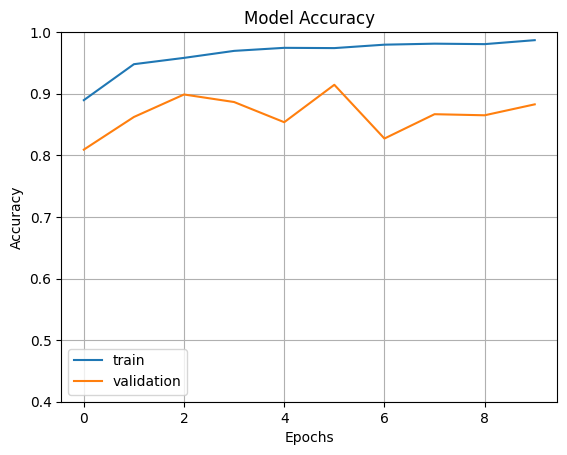

In [9]:
fig1 = plt.gcf()
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

In [10]:
import cv2
img_height, img_width = 32,32
image=cv2.imread(r"C:\Users\rahul\drowsiness-detection-main\Dataset\Test_Dataset\Closed_Eyes\s0012_00001_0_0_0_0_0_01.png")
image_resized= cv2.resize(image, (img_height,img_width))
image=np.expand_dims(image_resized,axis=0)

In [11]:
import cv2
img_height, img_width = 32,32
image=cv2.imread(r"C:\Users\rahul\drowsiness-detection-main\Dataset\Test_Dataset\Closed_Eyes\s0012_00001_0_0_0_0_0_01.png")
print(image.shape)
r_eye = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
print(r_eye.shape)
r_eye = cv2.resize(r_eye, (img_height,img_width))
print(r_eye.shape)
#r_eye= r_eye/255
r_eye=  r_eye.reshape((-1, 32, 32, 3))
print(r_eye.shape)
#r_eye = np.expand_dims(r_eye,axis=0)
pred=cnn_model.predict(r_eye)

(103, 103, 3)
(103, 103, 3)
(32, 32, 3)
(1, 32, 32, 3)
1/1 [==============================] - 0s 150ms/step


In [12]:
np.argmax(pred)

0

In [13]:
import cv2
img_height, img_width = 32,32
image=cv2.imread(r"C:\Users\rahul\drowsiness-detection-main\Dataset\Test_Dataset\Closed_Eyes\s0012_00001_0_0_0_0_0_01.png")
image_resized= cv2.resize(image, (img_height,img_width))
image=np.expand_dims(image_resized,axis=0)

In [14]:
pred=cnn_model.predict(image)

1/1 [==============================] - 0s 29ms/step


In [15]:
output_class=np.argmax(pred)
print("The predicted class is", output_class)
# 0 is close 1 is open

The predicted class is 0


In [16]:
cnn_model.save("./cnn.h5")

In [17]:
from keras.models import load_model
test_model = load_model('./cnn.h5')
pred = np.argmax(test_model.predict(image), axis=-1)
print(pred)

1/1 [==============================] - 0s 89ms/step
[0]


In [18]:
resnet50_model = Sequential()

pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(32,32,3),
                   pooling='avg',classes=2,
                   weights= 'imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

resnet50_model.add(pretrained_model)

In [19]:
resnet50_model.add(Flatten())
resnet50_model.add(Dense(128, activation='relu'))
resnet50_model.add(Dense(2, activation='softmax'))

In [20]:
resnet50_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten_1 (Flatten)         (None, 2048)              0         
                                                                 
 dense_2 (Dense)             (None, 128)               262272    
                                                                 
 dense_3 (Dense)             (None, 2)                 258       
                                                                 
Total params: 23,850,242
Trainable params: 262,530
Non-trainable params: 23,587,712
_________________________________________________________________


In [21]:
resnet50_model.compile(optimizer=Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=[tf.keras.metrics.CategoricalAccuracy(),tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])
history = resnet50_model.fit(train_generator, validation_data=validation_generator, epochs=10)

Epoch 1/10
500/500 [==============================] - 61s 114ms/step - loss: 0.1656 - categorical_accuracy: 0.9431 - precision_1: 0.9431 - recall_1: 0.9431 - val_loss: 0.3619 - val_categorical_accuracy: 0.8817 - val_precision_1: 0.8817 - val_recall_1: 0.8817
Epoch 2/10
500/500 [==============================] - 55s 110ms/step - loss: 0.0821 - categorical_accuracy: 0.9707 - precision_1: 0.9707 - recall_1: 0.9707 - val_loss: 0.4680 - val_categorical_accuracy: 0.8698 - val_precision_1: 0.8698 - val_recall_1: 0.8698
Epoch 3/10
500/500 [==============================] - 56s 111ms/step - loss: 0.0567 - categorical_accuracy: 0.9800 - precision_1: 0.9800 - recall_1: 0.9800 - val_loss: 0.7320 - val_categorical_accuracy: 0.8117 - val_precision_1: 0.8117 - val_recall_1: 0.8117
Epoch 4/10
500/500 [==============================] - 56s 112ms/step - loss: 0.0493 - categorical_accuracy: 0.9833 - precision_1: 0.9833 - recall_1: 0.9833 - val_loss: 0.6519 - val_categorical_accuracy: 0.8462 - val_precisi

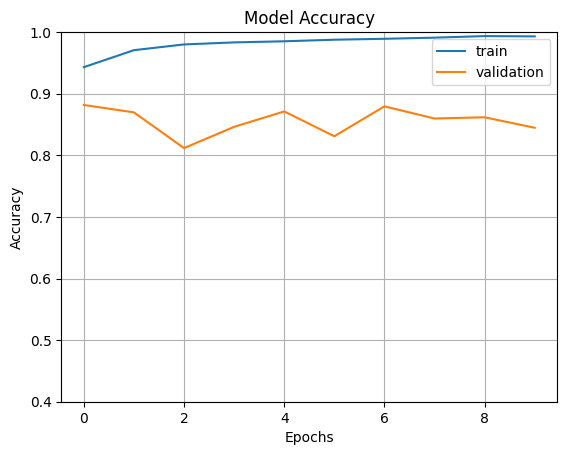

In [22]:
fig1 = plt.gcf()
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

In [23]:
resnet50_model.save("./resnet50.h5")

In [24]:
resnet50_model_regularized = Sequential()

pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(32,32,3),
                   pooling='avg',classes=2,
                   weights= 'imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

resnet50_model_regularized.add(pretrained_model)

In [25]:
resnet50_model_regularized.add(Flatten())
resnet50_model_regularized.add(Dense(128, activation='relu'))
resnet50_model_regularized.add(Dropout(0.5))
resnet50_model_regularized.add(Dense(2, activation='softmax'))

In [26]:
resnet50_model_regularized.compile(optimizer=Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=[tf.keras.metrics.CategoricalAccuracy(),tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])
history = resnet50_model_regularized.fit(train_generator, validation_data=validation_generator, epochs=10)

Epoch 1/10
500/500 [==============================] - 61s 113ms/step - loss: 0.2138 - categorical_accuracy: 0.9245 - precision_2: 0.9245 - recall_2: 0.9245 - val_loss: 0.4697 - val_categorical_accuracy: 0.8627 - val_precision_2: 0.8627 - val_recall_2: 0.8627
Epoch 2/10
500/500 [==============================] - 56s 113ms/step - loss: 0.1242 - categorical_accuracy: 0.9552 - precision_2: 0.9552 - recall_2: 0.9552 - val_loss: 0.5921 - val_categorical_accuracy: 0.8510 - val_precision_2: 0.8510 - val_recall_2: 0.8510
Epoch 3/10
500/500 [==============================] - 56s 112ms/step - loss: 0.1019 - categorical_accuracy: 0.9632 - precision_2: 0.9632 - recall_2: 0.9632 - val_loss: 0.4803 - val_categorical_accuracy: 0.8767 - val_precision_2: 0.8767 - val_recall_2: 0.8767
Epoch 4/10
500/500 [==============================] - 56s 113ms/step - loss: 0.0947 - categorical_accuracy: 0.9649 - precision_2: 0.9649 - recall_2: 0.9649 - val_loss: 0.5095 - val_categorical_accuracy: 0.8835 - val_precisi

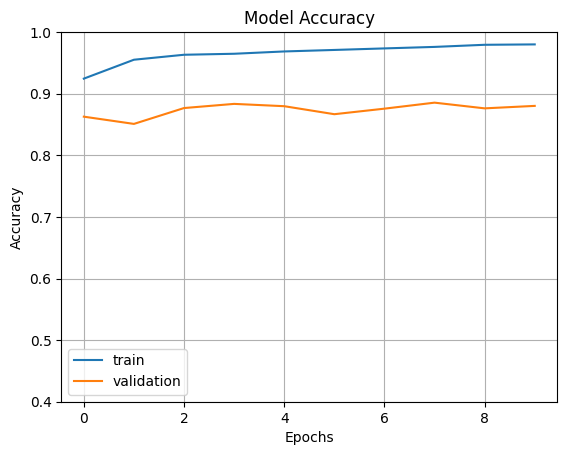

In [27]:
fig1 = plt.gcf()
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

In [28]:
resnet50_model_regularized.save("./resnet50_model_regularized.h5")

<a href="./resnet50_model_regularized.h5"> Download ResNet50 Regularized File </a>

In [30]:
resnet50_fine_tune1 = Sequential()

pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(32,32,3),
                   pooling='avg',classes=2,
                   weights= 'imagenet')
for layer in pretrained_model.layers:
        layer.trainable=True

resnet50_fine_tune1.add(pretrained_model)

In [31]:
resnet50_fine_tune1.add(Flatten())
resnet50_fine_tune1.add(Dense(128, activation='relu'))
resnet50_fine_tune1.add(Dropout(0.5))
resnet50_fine_tune1.add(Dense(2, activation='softmax'))

In [32]:
resnet50_fine_tune1.compile(optimizer=Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=[tf.keras.metrics.CategoricalAccuracy(),tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])
history = resnet50_fine_tune1.fit(train_generator, validation_data=validation_generator, epochs=10)

Epoch 1/10
500/500 [==============================] - 810s 2s/step - loss: 0.2230 - categorical_accuracy: 0.9267 - precision_3: 0.9267 - recall_3: 0.9267 - val_loss: 0.2586 - val_categorical_accuracy: 0.9062 - val_precision_3: 0.9062 - val_recall_3: 0.9062
Epoch 2/10
500/500 [==============================] - 818s 2s/step - loss: 0.1205 - categorical_accuracy: 0.9613 - precision_3: 0.9613 - recall_3: 0.9613 - val_loss: 0.4717 - val_categorical_accuracy: 0.8725 - val_precision_3: 0.8725 - val_recall_3: 0.8725
Epoch 3/10
500/500 [==============================] - 825s 2s/step - loss: 0.1188 - categorical_accuracy: 0.9597 - precision_3: 0.9597 - recall_3: 0.9597 - val_loss: 0.4584 - val_categorical_accuracy: 0.8545 - val_precision_3: 0.8545 - val_recall_3: 0.8545
Epoch 4/10
500/500 [==============================] - 827s 2s/step - loss: 0.0692 - categorical_accuracy: 0.9740 - precision_3: 0.9740 - recall_3: 0.9740 - val_loss: 1.0548 - val_categorical_accuracy: 0.7352 - val_precision_3: 0.

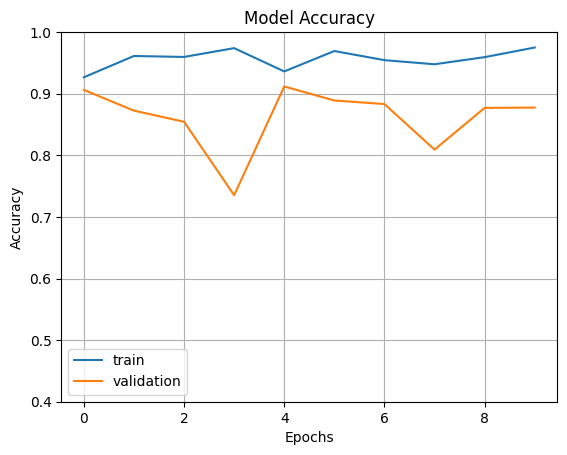

In [33]:
fig1 = plt.gcf()
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

In [36]:
resnet50_fine_tune1.save("./resnet50_fine_tune1.h5")

In [2]:
from tensorflow import keras

# Load the model
model = keras.models.load_model('cnn.h5')


125/125 [==============================] - 87s 643ms/step


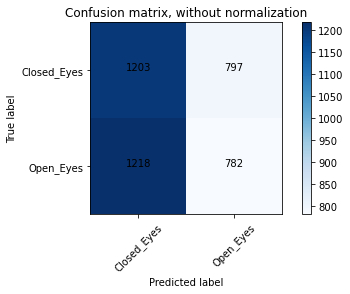

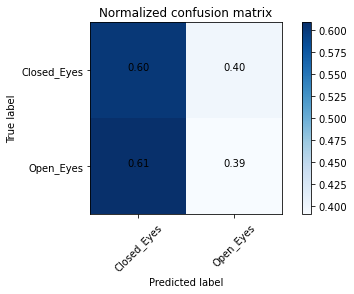

In [5]:
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import itertools

# Get the predicted classes
y_pred = model.predict(validation_generator)
y_pred_classes = np.argmax(y_pred, axis=1)

# Get the true classes
y_true = validation_generator.classes

# Get the class labels
class_labels = list(validation_generator.class_indices.keys())

# Calculate the confusion matrix
confusion_mtx = confusion_matrix(y_true, y_pred_classes)

# Plot the confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="black")
    
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(confusion_mtx, classes=class_labels,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(confusion_mtx, classes=class_labels, normalize=True,
                      title='Normalized confusion matrix')

plt.show()


125/125 [==============================] - 69s 457ms/step


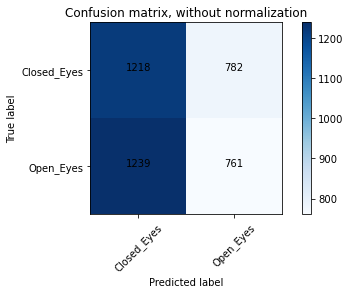

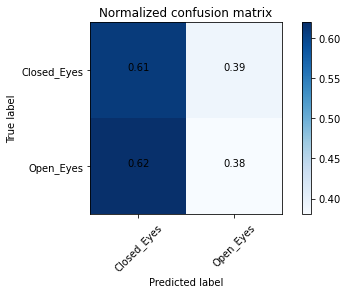

In [6]:
model = keras.models.load_model('resnet50.h5')

import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import itertools

# Get the predicted classes
y_pred = model.predict(validation_generator)
y_pred_classes = np.argmax(y_pred, axis=1)

# Get the true classes
y_true = validation_generator.classes

# Get the class labels
class_labels = list(validation_generator.class_indices.keys())

# Calculate the confusion matrix
confusion_mtx = confusion_matrix(y_true, y_pred_classes)

# Plot the confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="black")
    
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(confusion_mtx, classes=class_labels,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(confusion_mtx, classes=class_labels, normalize=True,
                      title='Normalized confusion matrix')

plt.show()


125/125 [==============================] - 61s 467ms/step


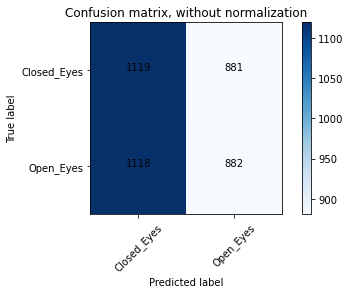

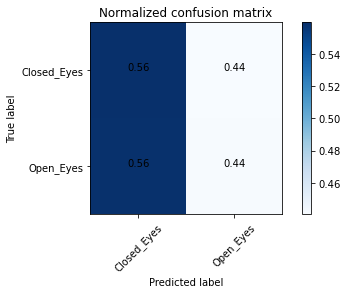

In [7]:
model = keras.models.load_model('resnet50_model_regularized.h5')

import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import itertools

# Get the predicted classes
y_pred = model.predict(validation_generator)
y_pred_classes = np.argmax(y_pred, axis=1)

# Get the true classes
y_true = validation_generator.classes

# Get the class labels
class_labels = list(validation_generator.class_indices.keys())

# Calculate the confusion matrix
confusion_mtx = confusion_matrix(y_true, y_pred_classes)

# Plot the confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="black")
    
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(confusion_mtx, classes=class_labels,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(confusion_mtx, classes=class_labels, normalize=True,
                      title='Normalized confusion matrix')

plt.show()


125/125 [==============================] - 75s 493ms/step


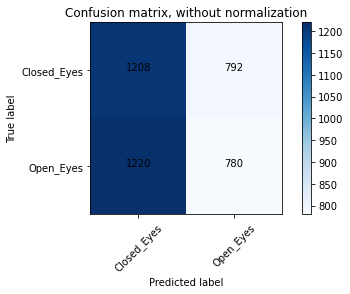

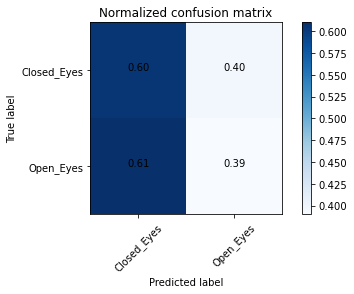

In [8]:
model = keras.models.load_model('resnet50_fine_tune1.h5')

import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import itertools

# Get the predicted classes
y_pred = model.predict(validation_generator)
y_pred_classes = np.argmax(y_pred, axis=1)

# Get the true classes
y_true = validation_generator.classes

# Get the class labels
class_labels = list(validation_generator.class_indices.keys())

# Calculate the confusion matrix
confusion_mtx = confusion_matrix(y_true, y_pred_classes)

# Plot the confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="black")
    
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(confusion_mtx, classes=class_labels,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(confusion_mtx, classes=class_labels, normalize=True,
                      title='Normalized confusion matrix')

plt.show()


In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
data_dir = r"C:\Users\tarak\Downloads\drowsiness-detection-main\Dataset\Test_Dataset"
# Create test generator
test_datagen = ImageDataGenerator()
test_generator = test_datagen.flow_from_directory(
    data_dir,
    target_size=(32,32),
    batch_size=32,
    shuffle=False,
    class_mode='categorical',
    subset=None)

# Get the test images and labels
test_images, test_labels = next(test_generator)   

Found 2000 images belonging to 2 classes.


In [25]:
import tensorflow as tf
import matplotlib.pyplot as plt

# Load saved models
model_names = ['cnn.h5', 'resnet50.h5', 'resnet50_model_regularized.h5', 'resnet50_fine_tune1.h5']
models = []

for name in model_names:
    model = tf.keras.models.load_model(name)
    models.append(model)

# Evaluate models on test set
test_loss = []
# test_acc = []

for model in models:
    loss = model.evaluate(test_images, test_labels, verbose=2)
    test_loss.append(loss)
#     test_acc.append(acc)

# Calculate accuracy from loss
test_acc = [1 - loss for loss in test_loss]

# Plot accuracy comparison graph
plt.bar(model_names, test_acc)
plt.title('Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim([0.8, 1])
plt.show()


1/1 - 1s - loss: 3.9115e-06 - categorical_accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - 721ms/epoch - 721ms/step
1/1 - 3s - loss: 2.9774e-05 - categorical_accuracy: 1.0000 - precision_1: 1.0000 - recall_1: 1.0000 - 3s/epoch - 3s/step
1/1 - 3s - loss: 1.9313e-04 - categorical_accuracy: 1.0000 - precision_2: 1.0000 - recall_2: 1.0000 - 3s/epoch - 3s/step
1/1 - 3s - loss: 4.4961e-05 - categorical_accuracy: 1.0000 - precision_3: 1.0000 - recall_3: 1.0000 - 3s/epoch - 3s/step


TypeError: unsupported operand type(s) for -: 'int' and 'list'

In [20]:
from keras.models import load_model
from keras.utils.vis_utils import plot_model

# Load the saved model
model = load_model('cnn.h5')

# Plot the CNN architecture
plot_model(model, to_file='cnn_architecture.png', show_shapes=True)


You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.
